# Name: Kelvin Mwangi Kibung'a
# Class : Data Science Hybrid
# TM: MaryAnn Mwikali


## 1. BUSINESS UNDERSTANDING

The financial field has to be handled with a lot of sensitivity especially when lending money to customers.The primary goal of this loan approval model project is to automate and improve the decision-making process for approving or rejecting loan applications. This will be done by building a machine learning model that predicts the likelihood of a loan applicant defaulting on a loan based on historical data.

### Predict Loan Default Risk:
The model aims to predict whether a loan applicant is likely to repay the loan or default. This enables financial institutions to make informed lending decisions.
### Streamline Loan Approval Process:
Automating the process helps to reduce human error, save time, and scale the approval process for large volumes of applications.
### Improve Customer Experience:
Faster, more accurate loan decisions result in a better experience for customers, improving satisfaction and trust in the institution. 

## 2. PROBLEM STATEMENT


Loan approval decisions are traditionally made using manual processes, which are time-consuming and subject to human biases. Furthermore, lenders may struggle with accurately predicting which applicants will repay their loans. The problem is to design a model that uses historical data to identify patterns and predict whether a borrower is likely to default on a loan.

### Key challenges:

### Data quality and availability: 
Access to clean, structured, and relevant historical data, such as credit scores, loan histories, and applicant details.
### Fairness and bias:
The model must avoid discrimination against certain demographics (e.g., age, gender, race).
Regulatory compliance: Ensuring the model aligns with financial regulations such as fair lending practices.

## 3. SCOPE OF THE PROJECT

The scope defines what will and will not be included in the project.

### In-Scope:

Data collection and analysis of historical loan approval data.

Building and training the machine learning model.

Model evaluation and validation (e.g., assessing accuracy, precision, recall, etc.).

### out of scope

The development of new loan products.

Post-loan servicing or collection processes.

Data collection from external or non-traditional data sources (unless the company has access to them).

## 4. STAKEHOLDERS INVOLVED

### Business Owners/Executives:
Will use the model to make informed decisions on lending practices, risk assessment, and financial strategy.
### Credit Risk Analysts:
These professionals evaluate the creditworthiness of applicants. The model will assist them in their analysis and help standardize risk assessments.
### Data Science and IT Teams:
Responsible for building and deploying the model.
### Customers:
Loan applicants who are affected by the approval or rejection decisions. A more accurate model means fairer and more consistent decisions.
### Regulators: 
They will need to ensure that the model complies with financial regulations and ethical standards.

## 5. SUCCESS CRITERIA

The model's success will be measured based on its ability to improve the loan approval process. Success metrics could include:

### Model Accuracy:
How well the model predicts whether a loan applicant will default or repay.
### Precision and Recall:
For better handling of false positives (approving loans that shouldn't be approved) and false negatives (rejecting loans that should be approved).
### Business Impact:
Improvements in key business metrics such as reduced loan defaults, faster processing times, or better customer retention.
Regulatory Compliance: Ensuring the model adheres to relevant financial and privacy regulations.
Scalability: Ability to handle a large number of loan applications.

## 6. DATA UNDERSTANDING


Data is the foundation of any predictive model. For the loan approval model, the data typically includes:

### Applicant Demographics: 
Age, gender, marital status, employment status, income, etc.
### Credit History:
Credit score, previous loan information, repayment history, etc.
### Loan Details:
Loan amount, loan type, term length, etc.
### Behavioral Data:
Transactions, savings, and spending habits that may indicate financial responsibility.
Economic Factors: Macroeconomic data such as unemployment rates, inflation, or regional economic conditions (optional, but helpful in some cases).

### IMPORTING REELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
#from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.svm import SVC

## Reading the dataset 

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
#check the first 10 columns of the data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# check the shape of the data
df.shape

(45000, 14)

In [5]:
#check for any missing data
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

The dataset has 45000 columns and 15 rows with no missing data in any of the rows. 

In [6]:
#check the general statistics of the numerical columns
d =pd.DataFrame(df.describe())
print(d)

         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

The data has no unique identifiers so duplicates should not be a concern for thi project

## EXPLOLATORY DATA ANALYSIS

Here we  investigate the dsitribution of our data and relationship between our data

loan_status
0    35000
1    10000
Name: count, dtype: int64


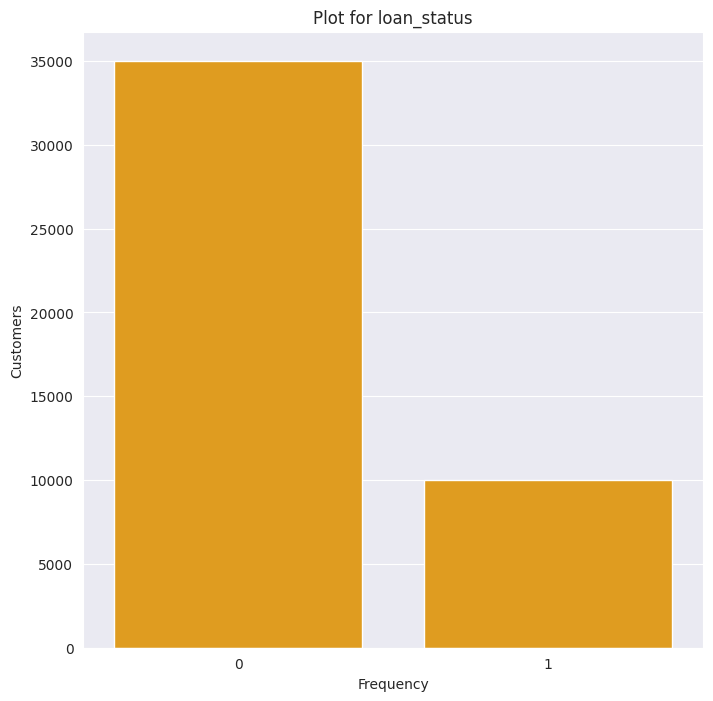

In [7]:
#check the distribution of our target varibale using a function
def plot_category_distribution(df, column_name, plot_title, x_label, y_label):
   
    # Count the occurrences of each category in the specified column
    counts = df[column_name].value_counts()
    print(counts)
    
    # Create a plot
    plt.figure(figsize=(8,8))
    sns.countplot(x=column_name, data=df, color="orange")
    
    # Set the title and labels
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.show()
    
plot_category_distribution(df, 'loan_status', 'Plot for loan_status', 'Frequency', 'Customers')


here we check for the people who qualified for the loan vs those who did not. 1 means that the loan was approved and 0 means it was not approved

In [8]:
# looking at the distribution ofthe numerical columns in our data
numerical_columns = df.select_dtypes(include = [int,float])
numerical_columns

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


## Bivariate analysis of numerical columns against the target variable

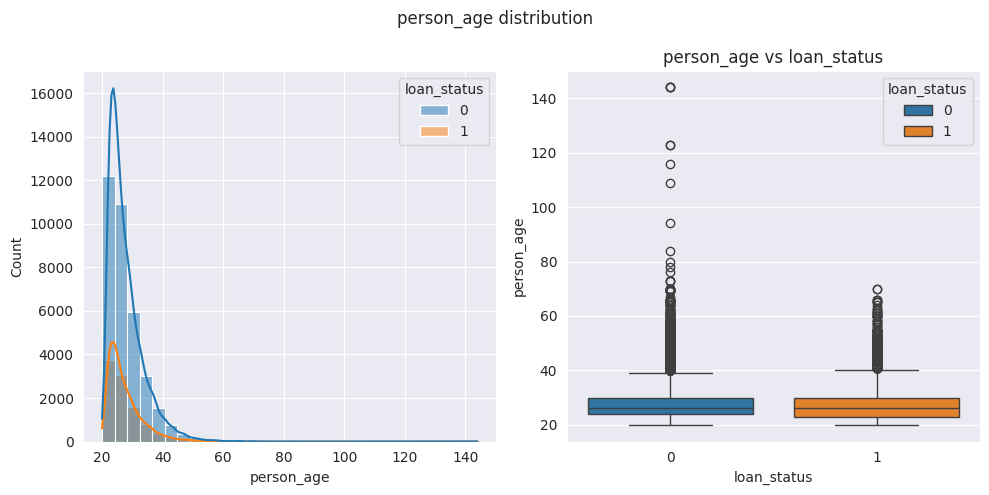

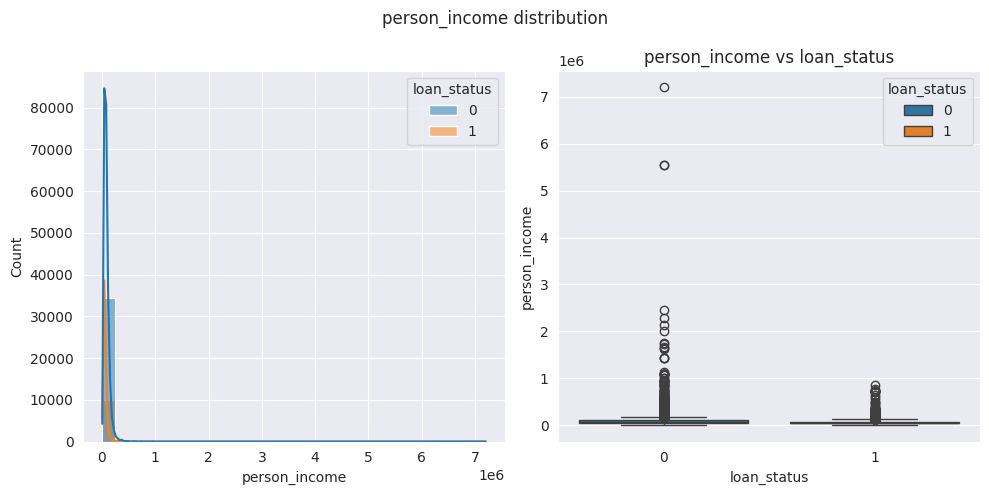

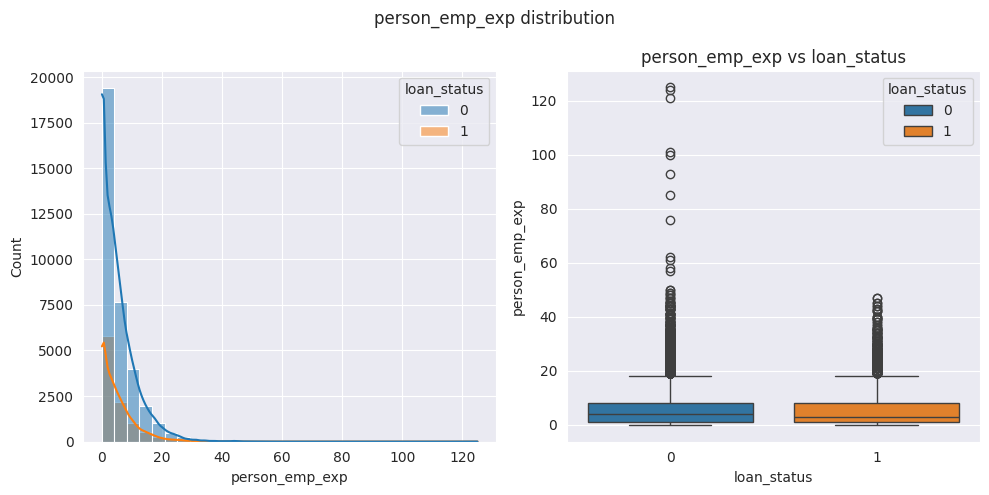

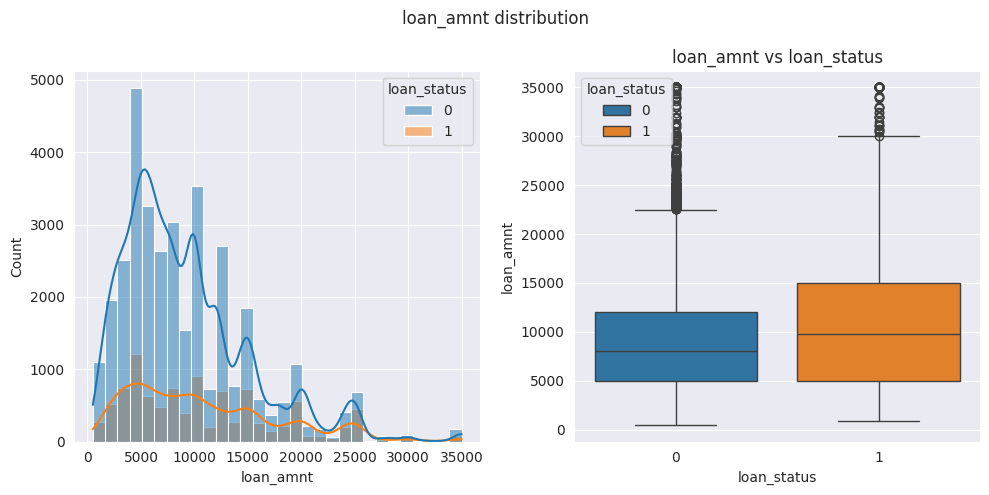

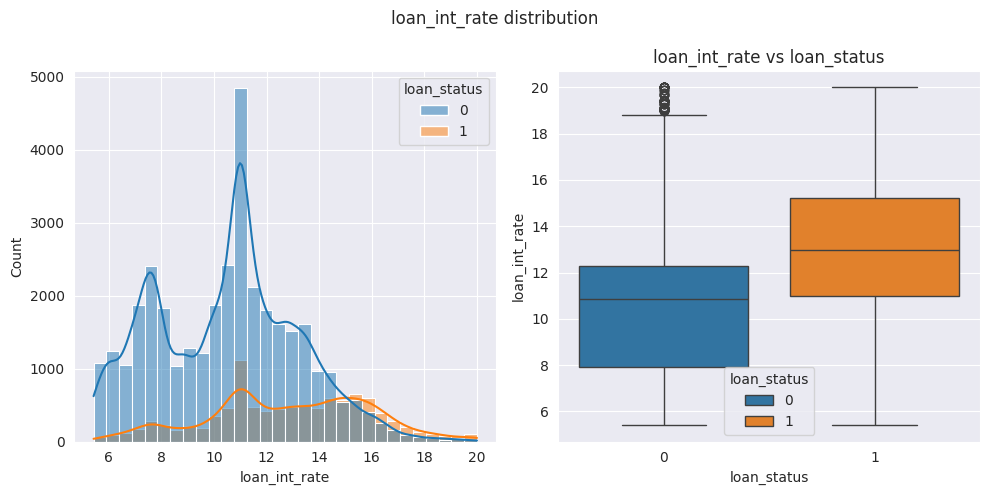

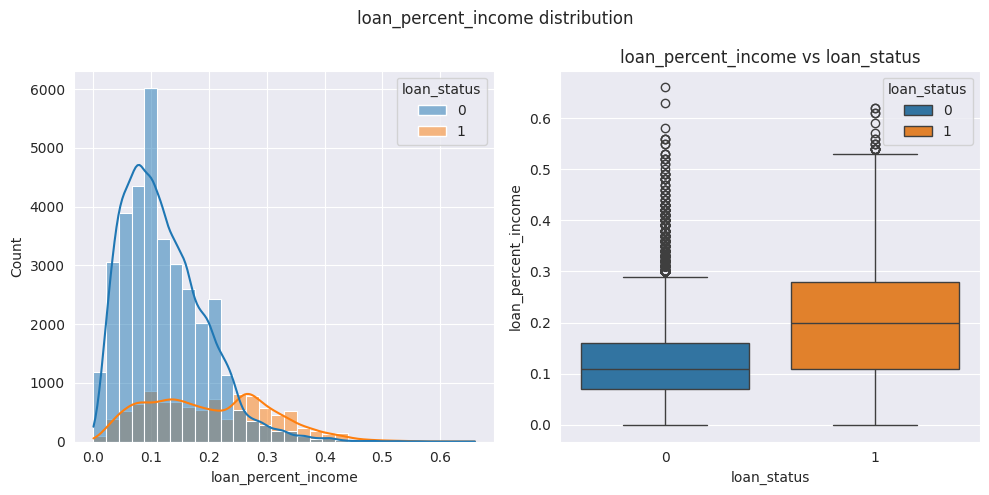

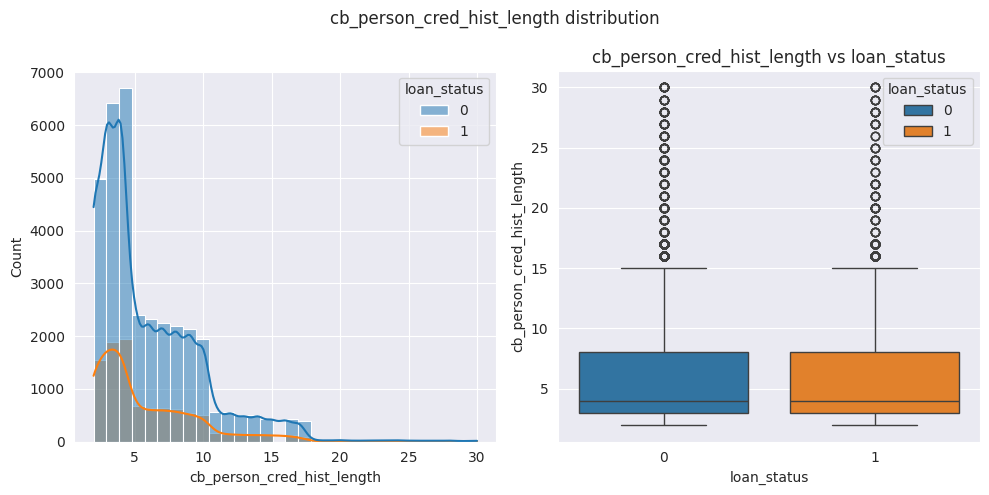

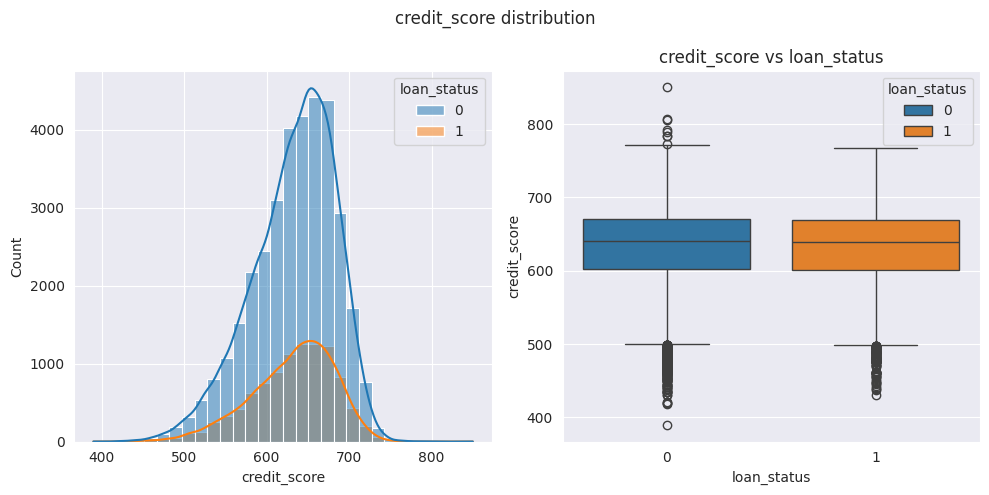

In [9]:
%matplotlib inline 
exogenous_variables = df.drop(columns = 'loan_status')
cols =exogenous_variables.select_dtypes(include=['number']).columns.tolist()
for col in cols:
            figsize=(10,5)
           
            fig, axes = plt.subplots(1,2, figsize=figsize)
            
            sns.histplot(data=df, x=df[col], ax=axes[0],hue = df['loan_status'] ,bins=30, kde=True)
            plt.suptitle(f'{col} distribution')
            sns.boxplot(x=df['loan_status'], y=df[col], ax=axes[1],hue = df['loan_status'])
            plt.title(f'{col} vs loan_status')
            plt.xlabel('loan_status')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

## From the above plots we gain the following useful insights:

Most of the people who request for loans are of low income.

The young people are mostly the ones who apply for loans in this financial institution.

Individuals with an average credit score are the ones who are in need of the loans.

And lastly,generally from all the above visualisations, it is evident that most of the loans are denied despite the factor in question and that is what we are looking forward to improve on.


## Analysis of our categorical variables

In [10]:
# Frst select the categorical variables
categorical_variables = df.select_dtypes(include = [object])
categorical_variables

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


person_gender
male      24841
female    20159
Name: count, dtype: int64


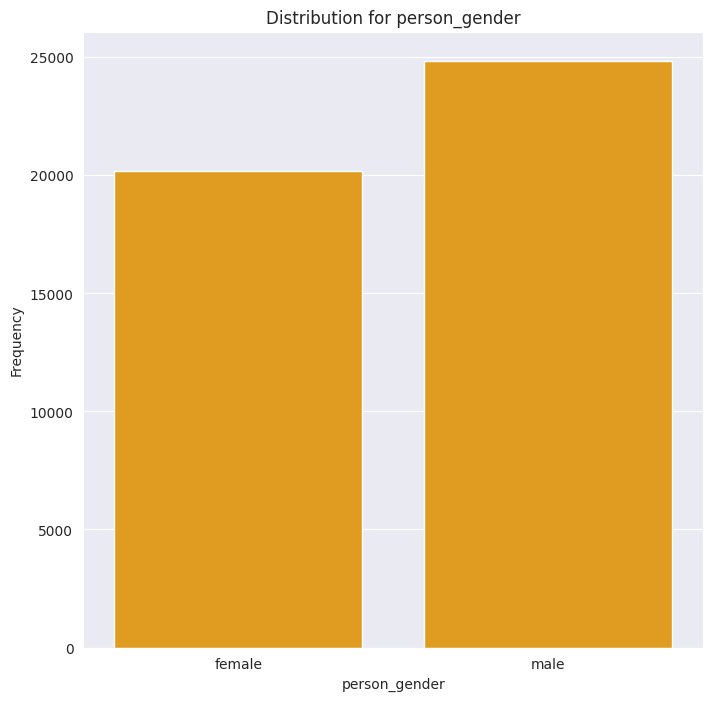

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


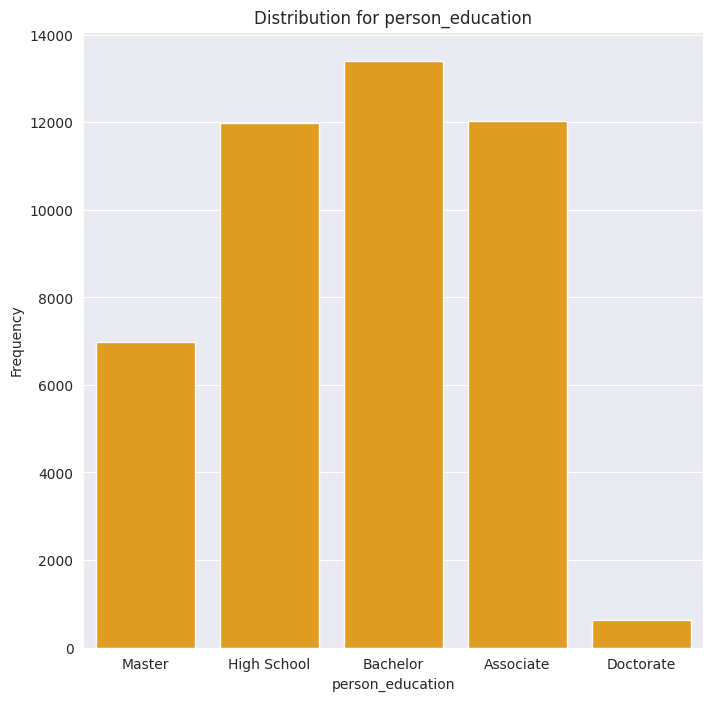

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


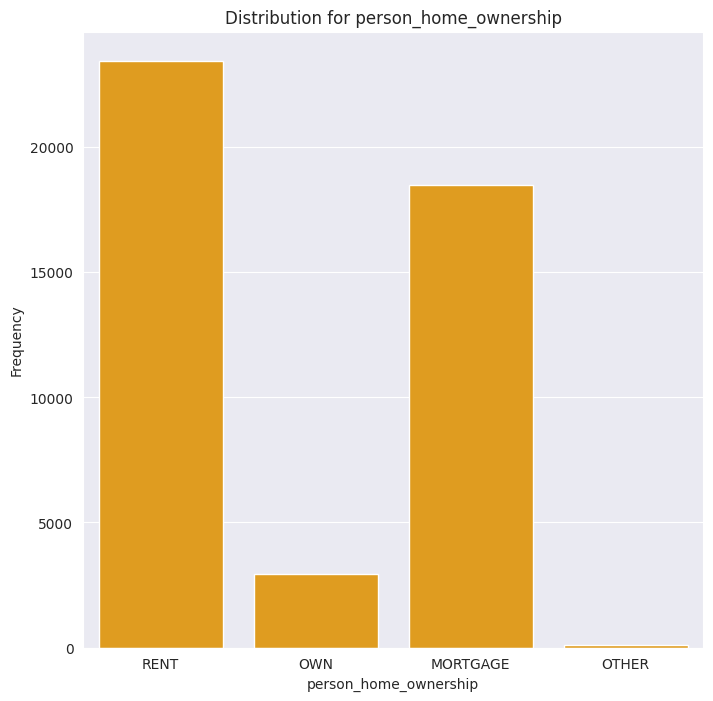

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


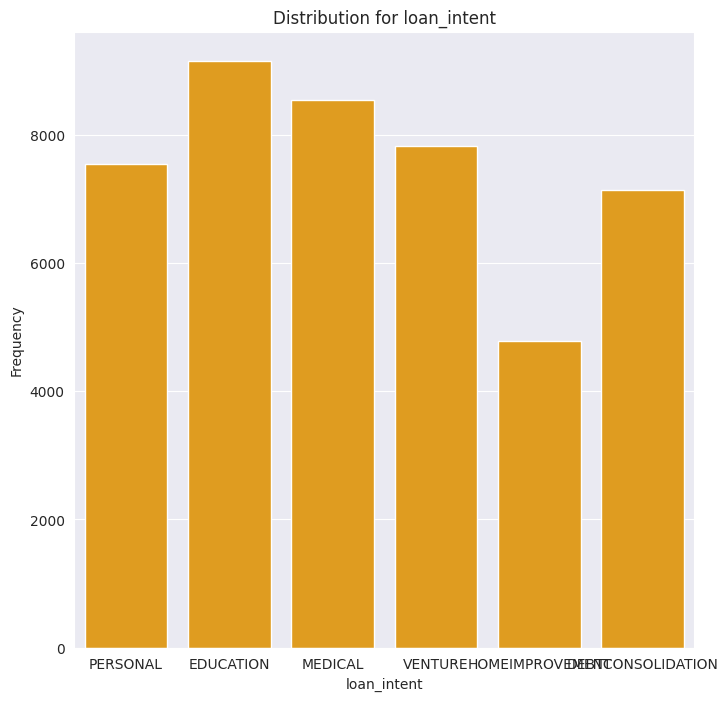

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


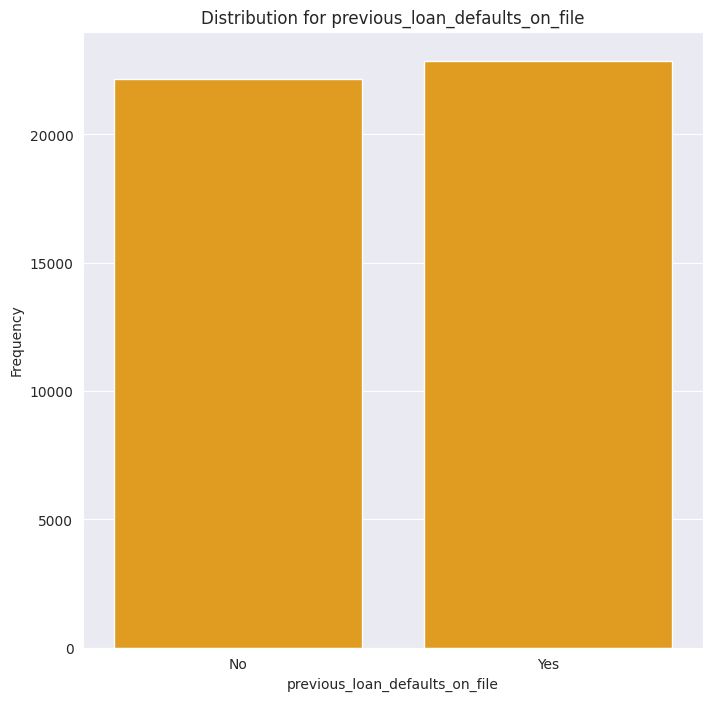

In [11]:
#check the value count and visualize the categorical_columns to check their distribution
for column in categorical_variables:
    plot_category_distribution(df, column, f'Distribution for {column}', f'{column}','Frequency')


## From the above visuals,we can make the following observations:

Almost half of the people have defaulted from previous loan payments and this partially explains why most of the loan applications have been denied.

Male loan applicants are slightly higher than the female applicants.

Most of the loan applicants have a bachelors degree. Probably looking to repay their student loans.

People who are paying rent and those servicing their mortgages make up the most of the applicants.

Education and medical reasons why most people look for the loans.


## comparison of the categorical variables against the target variable

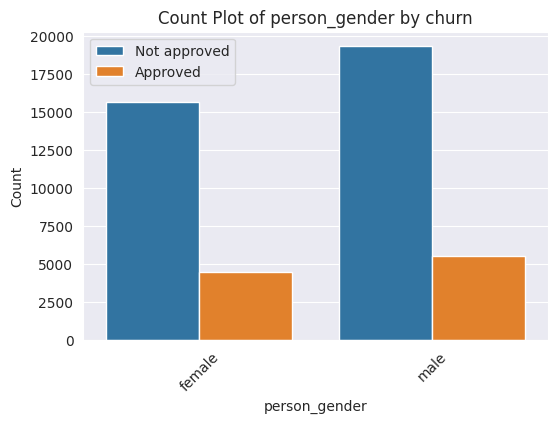

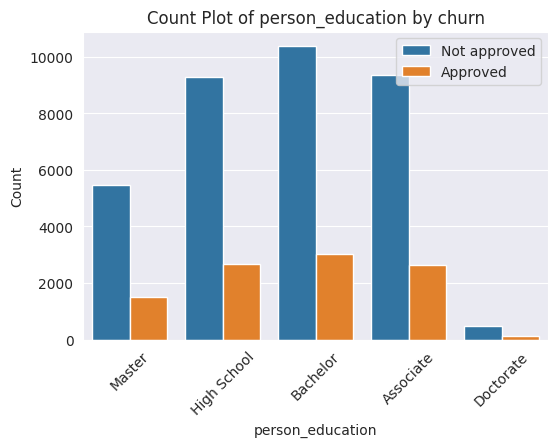

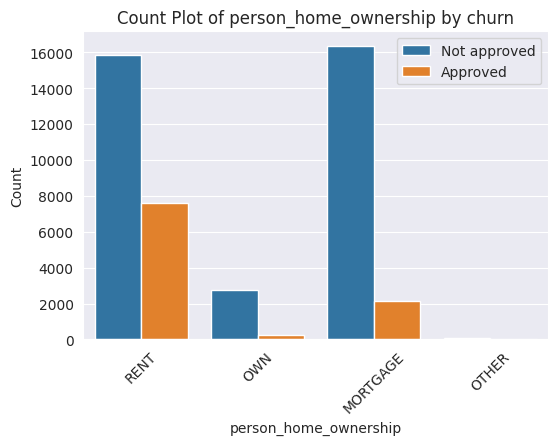

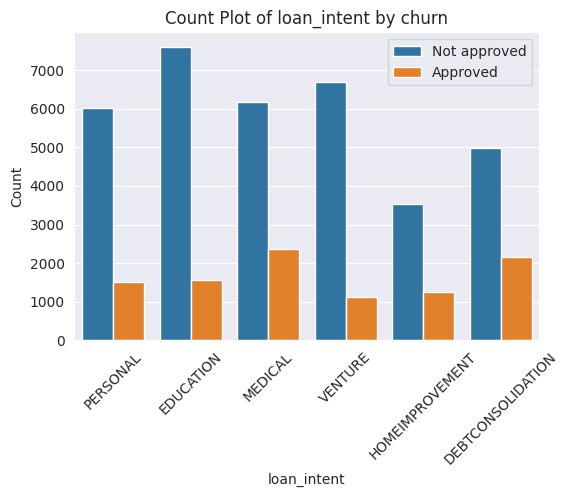

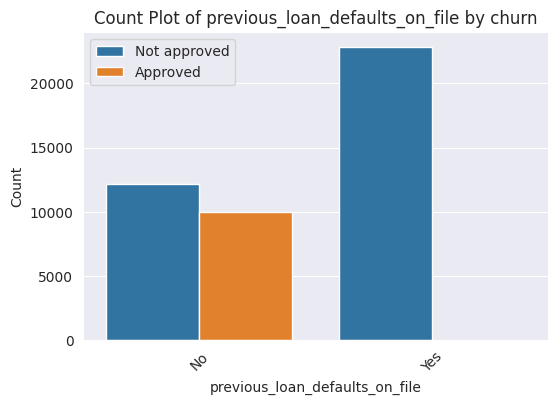

In [12]:
for column in categorical_variables:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue='loan_status')
    plt.title(f'Count Plot of {column} by churn', fontsize=12)
    plt.xlabel(column)
    plt.xticks(rotation = 45)
    plt.ylabel('Count')
    plt.legend(labels=['Not approved', 'Approved'])
    plt.show()

## It is observable that:
The people with a loan default history do not qualify for a loan at all.

People who are tenants qualify fro loans than all others in that category.

For the loan_intent,the people who requested medical loans qualify most.


## DATA INSPECTION FOR HIGH CORRELATION AND OTHER FACTORS THAT COULD AFFECT OUR MODEL

In [13]:
#inspect the age for outliers
df['person_age'].max()

np.float64(144.0)

In [14]:
#The age above considering the average life expectancy does not make much sense especially to the financial industry,
#  Calculate the Z-scores for the 'age' column and cap it at age 60
df['age_zscore'] = zscore(df['person_age'])
df = df[df['person_age'] <= 60]
df['person_age'].max()


np.float64(60.0)

In [15]:
df.shape

(44922, 15)

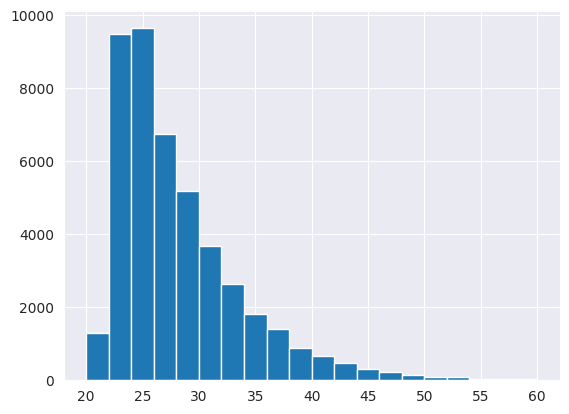

In [16]:
#make a new plot to investigate the distribution of our new age
plt.hist(df['person_age'],bins =20)
plt.show()


In [17]:
# transform the categorical variables into numerical datatypes
variables_to_encode = categorical_variables.columns
df = pd.get_dummies(df,columns = variables_to_encode,drop_first = True,dtype = int)

df['loan_status'] = df['loan_status'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44922 entries, 0 to 44999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          44922 non-null  float64
 1   person_income                       44922 non-null  float64
 2   person_emp_exp                      44922 non-null  int64  
 3   loan_amnt                           44922 non-null  float64
 4   loan_int_rate                       44922 non-null  float64
 5   loan_percent_income                 44922 non-null  float64
 6   cb_person_cred_hist_length          44922 non-null  float64
 7   credit_score                        44922 non-null  int64  
 8   loan_status                         44922 non-null  int64  
 9   age_zscore                          44922 non-null  float64
 10  person_gender_male                  44922 non-null  int64  
 11  person_education_Bachelor           44922 non-

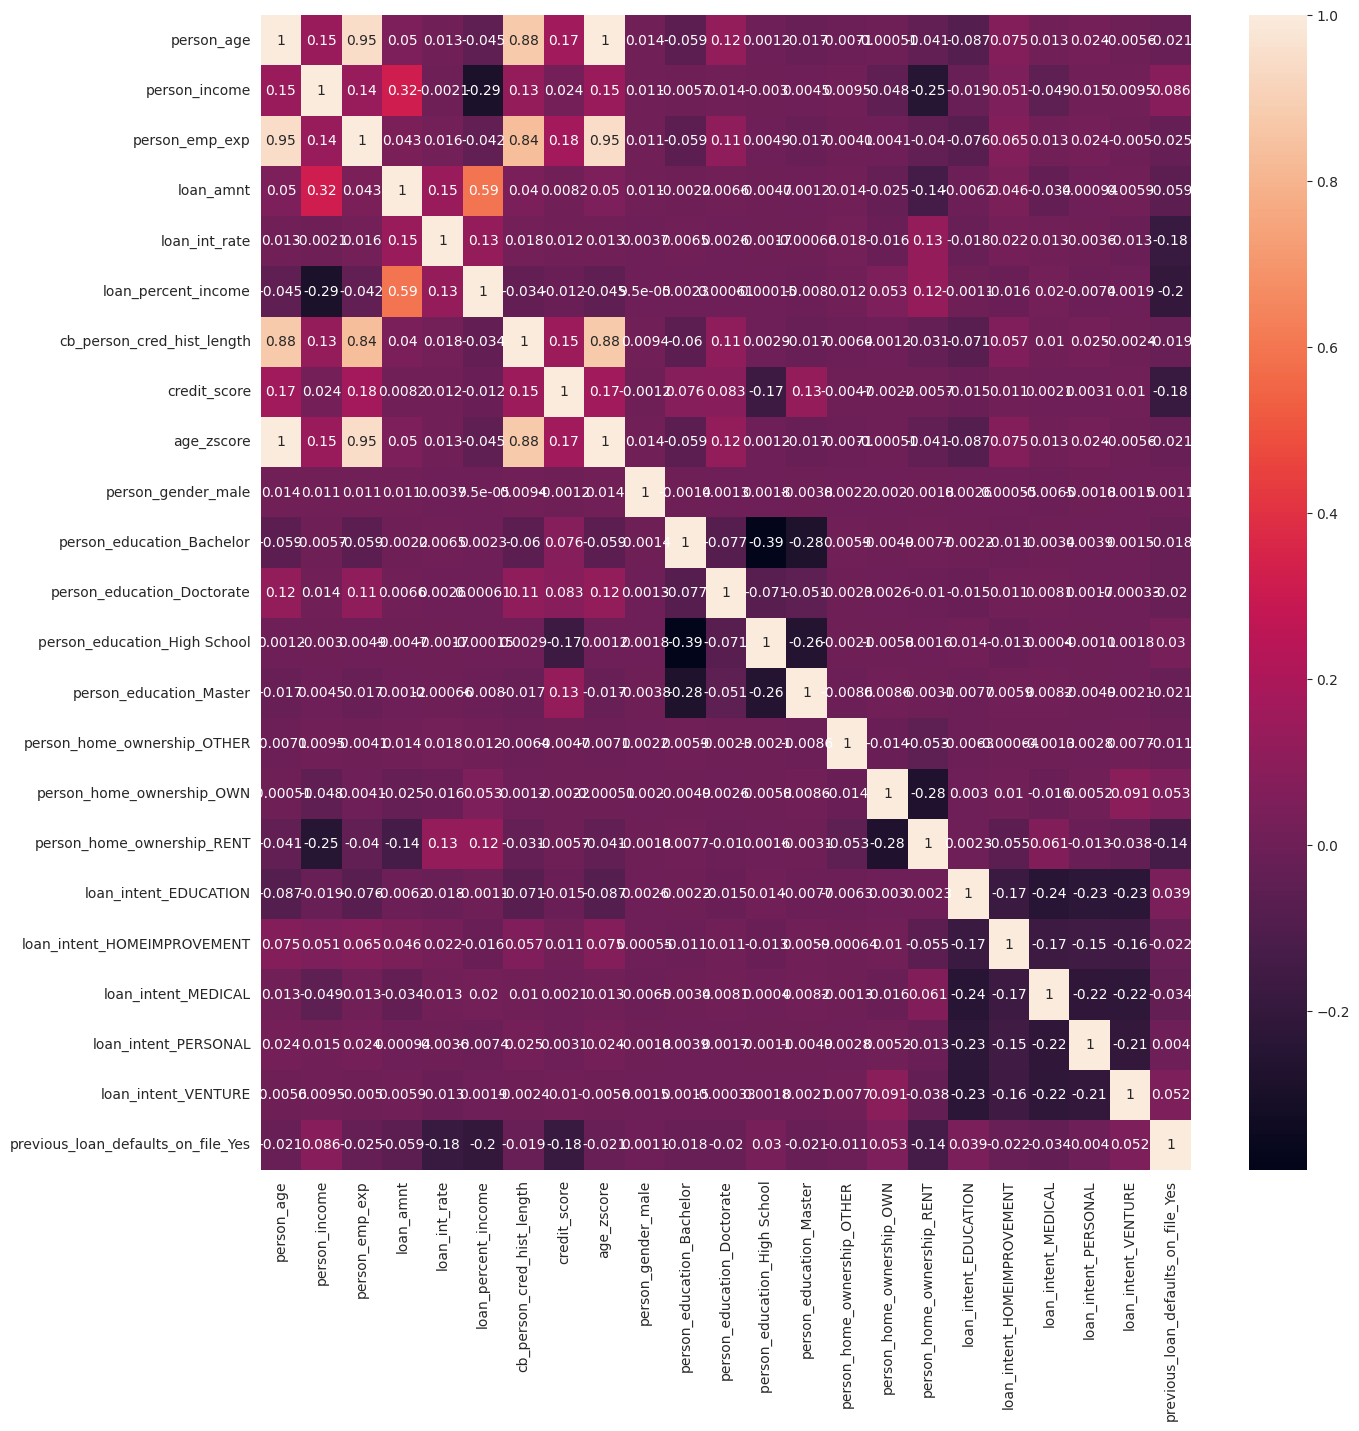

In [19]:
# Create a correlation Matrix
df_corr = df.drop(columns = 'loan_status')
corr_matrix = df_corr.corr()
#fit a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot = True)

plt.show()

From the correlation matrix most of our variables have a very low correlation with each other,however some have a very high correlation and we shall drop them

In [20]:
threshold = 0.8

# Find pairs of highly correlated features
corr_pairs = corr_matrix.unstack().sort_values(kind="heap", ascending=False)
high_corr_pairs = [(i, j) for i, j in corr_pairs.index if i != j and abs(corr_pairs[i, j]) > threshold]

# Print highly correlated pairs
print("Highly correlated pairs (threshold = 0.8):")
for pair in high_corr_pairs:
    print(pair, corr_pairs[pair])

# Drop one of the variables from each pair
for i, j in high_corr_pairs:
    if j in df.columns:
        df.drop(j, axis=1, inplace=True)

print("\nDataFrame after removing highly correlated variables:")
print(df)

Highly correlated pairs (threshold = 0.8):
('person_age', 'age_zscore') 1.0000000000000084
('age_zscore', 'person_age') 1.0000000000000084
('person_age', 'person_emp_exp') 0.9488325909300653
('person_emp_exp', 'person_age') 0.9488325909300653
('age_zscore', 'person_emp_exp') 0.9488325909300519
('person_emp_exp', 'age_zscore') 0.9488325909300519
('age_zscore', 'cb_person_cred_hist_length') 0.8758560084364256
('cb_person_cred_hist_length', 'age_zscore') 0.8758560084364256
('person_age', 'cb_person_cred_hist_length') 0.8758560084364247
('cb_person_cred_hist_length', 'person_age') 0.8758560084364247
('cb_person_cred_hist_length', 'person_emp_exp') 0.8354325594428577
('person_emp_exp', 'cb_person_cred_hist_length') 0.8354325594428577

DataFrame after removing highly correlated variables:
       person_income  loan_amnt  loan_int_rate  loan_percent_income  \
0            71948.0    35000.0          16.02                 0.49   
1            12282.0     1000.0          11.14                 0

<Axes: >

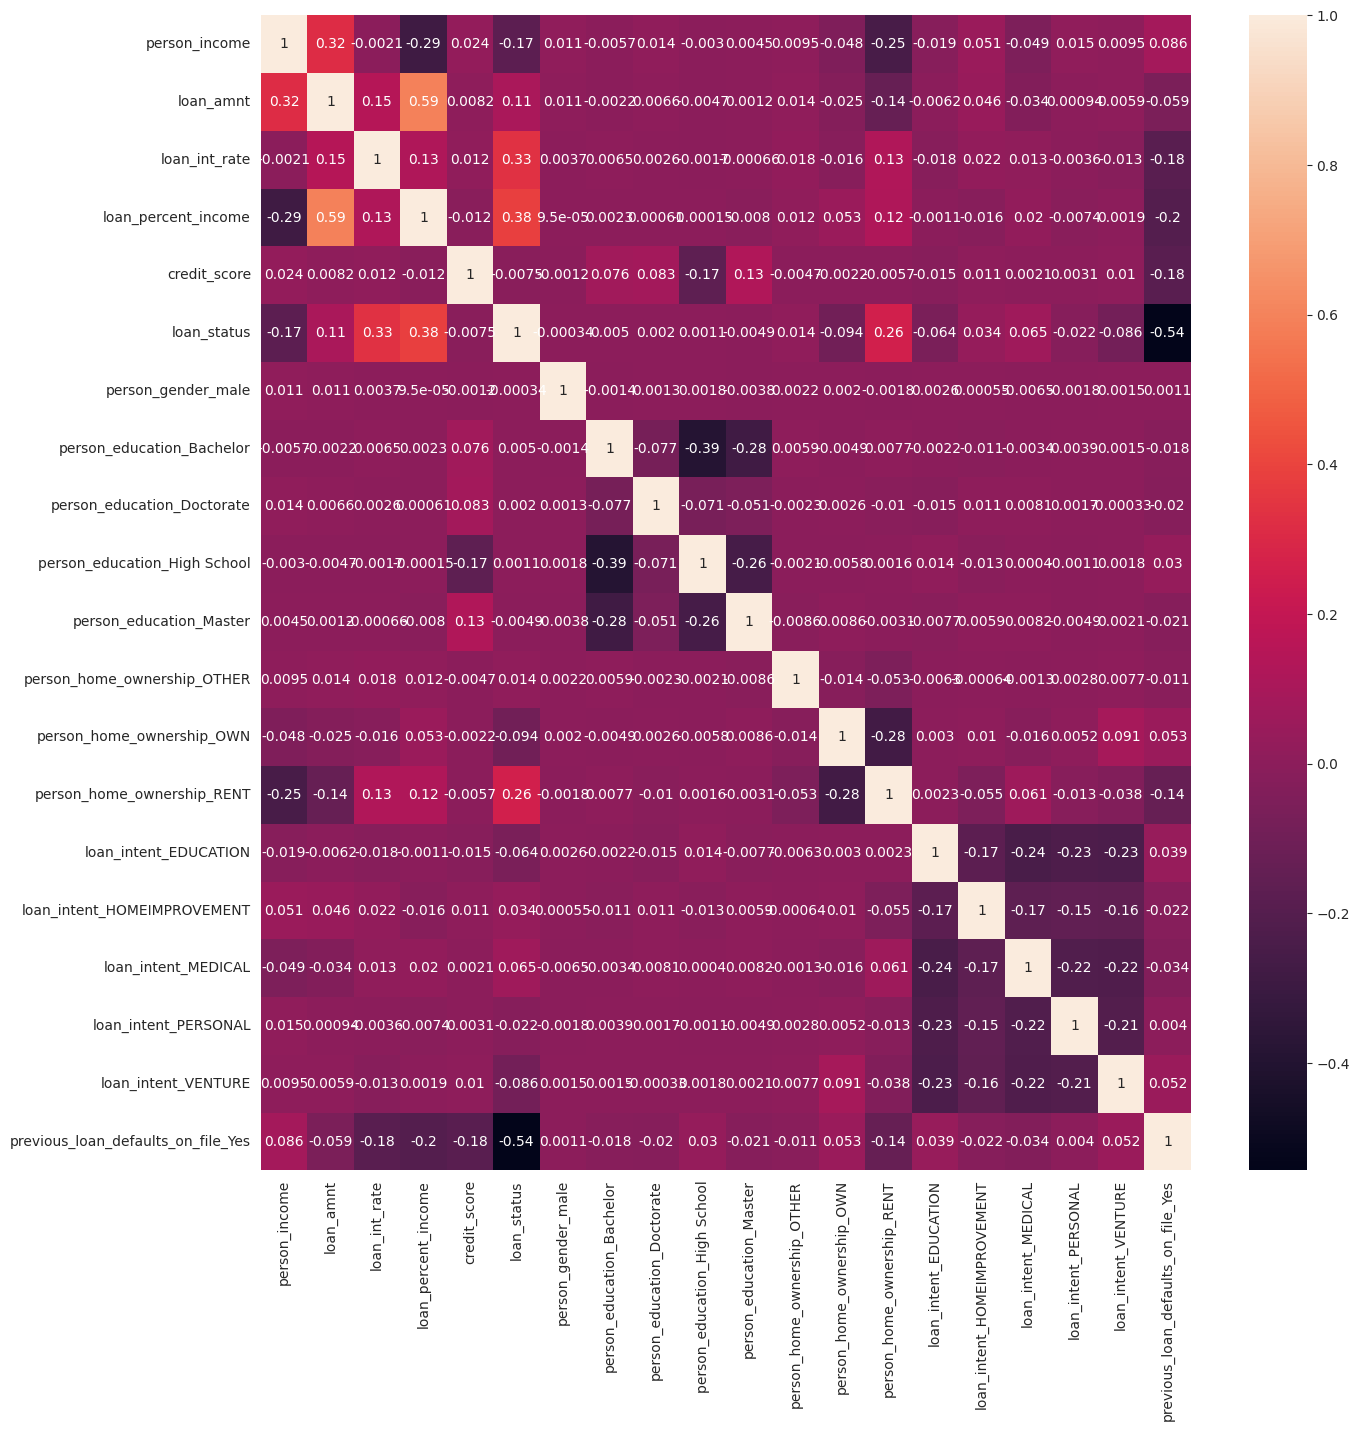

In [21]:
#we check our new heatmap
new_corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(new_corr,annot = True)

In [22]:
# Calculate z-scores for each column
z_scores = np.abs(zscore(df))

# Define a threshold for outliers
threshold = 4

# Create a boolean mask indicating outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
df_clean= df[~outlier_mask]

In [24]:
df_clean.shape

(43633, 20)

In [ ]:
# Split the dataset
# Define the X and the y  variable
X = df_clean.drop(columns=['churn']) 
y = df_clean['churn'] 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## We get into inspecting our datasets for overfitting and underfitting

In [27]:
# Split the dataset
# Define the X and the y  variable
X = df_clean.drop(columns=['loan_status']) 
y = df_clean['loan_status'] 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
models = [
      ('K Nearest Neighbors', KNeighborsClassifier()),
      ('Xgboost', XGBClassifier()),
      ('Logistic Regression', LogisticRegression()),
      ('Random Forest', RandomForestClassifier()),
      ('SVC',SVC())
]


scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores.append((name, train_score, test_score))
# Display Model Performance
for name, train_score, test_score in scores:
    print(f'{name}:\n Train Score = {train_score*100:.4f}\n Test Score = {test_score*100:.4f}\n')

K Nearest Neighbors:
 Train Score = 92.8462
 Test Score = 89.8616

Xgboost:
 Train Score = 96.5377
 Test Score = 93.1708

Logistic Regression:
 Train Score = 89.6895
 Test Score = 89.7057

Random Forest:
 Train Score = 99.9969
 Test Score = 92.6849

SVC:
 Train Score = 92.1373
 Test Score = 91.5666

